<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot


In [2]:
data=pd.read_csv('/content/drive/MyDrive/tunnel.csv')

# Implement and compare 3 models
ARIMA

Prophet

LSTM

Goal: To predict last 7 days of traffic volume.

In [3]:
data.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


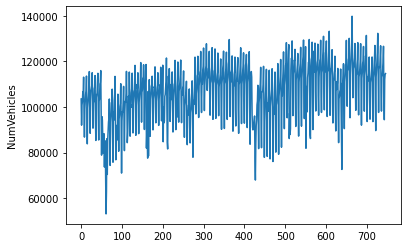

In [4]:
figsize=(20,6)
sns.lineplot(data=data['NumVehicles'])

plt.show()

In [5]:
data.describe()

,NumVehicles
count,747.00000
mean,106567.75502
std,12456.35049
min,53098.00000
25%,98794.00000
50%,108204.00000
75%,115477.00000
max,139840.00000


In [6]:
data.isna().sum()

Day            0
NumVehicles    0
dtype: int64

In [7]:
ts=data.copy()
ts.set_index('Day',inplace=True)
size=int(len(ts)-7)

In [8]:
ts.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [13]:
train=ts.iloc[:size,:].values
test=ts.iloc[size:,:].values

# ARIMA

In [10]:
t=data.reset_index()
t=t['NumVehicles']
n=len(t)-1
z=np.arange(n)
for i in range(1,n+1):
  z[i-1]=t[i]-t[i-1]



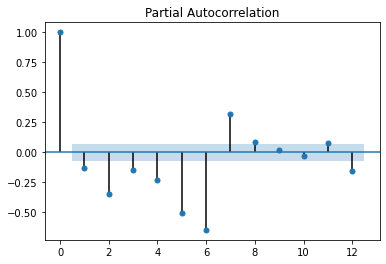

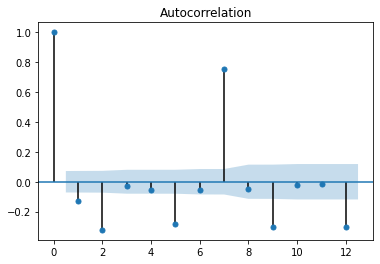

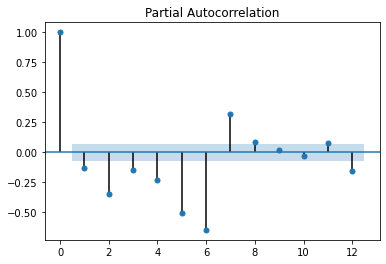

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(z, lags=12)
plot_pacf(z, lags=12)

In [15]:
from sklearn.metrics import mean_squared_error
history = [x for x in train]
predictions = list()

for t in range(len(test)):
   
    model = ARIMA(history, order=(7,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
   
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

Test MSE: 4030.644


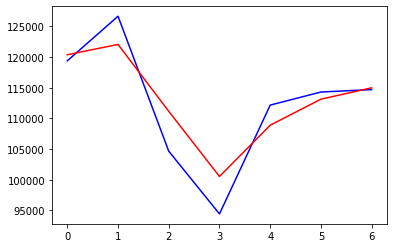

In [18]:
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

In [19]:
ts = data.reset_index()
ts.rename(columns={'Day':'ds', 'NumVehicles':'y'}, inplace=True)

df_train = ts.iloc[:size]
df_predict = ts['ds'].to_frame() 

In [22]:
from prophet import Prophet

In [23]:

model = Prophet()
model.fit(df_train)
predictions = model.predict(df_predict[size:])

error = mean_squared_error(test, predictions.yhat)
rmse = mean_squared_error(test, predictions.yhat)**0.5
print('Test MSE: %.3f' % rmse)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Test MSE: 2397.906


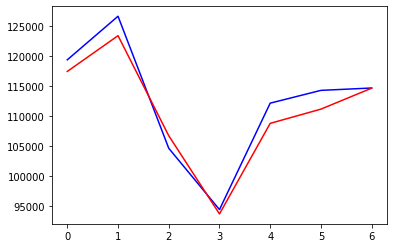

In [24]:
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions.yhat, color='red', label='pred')
pyplot.show()

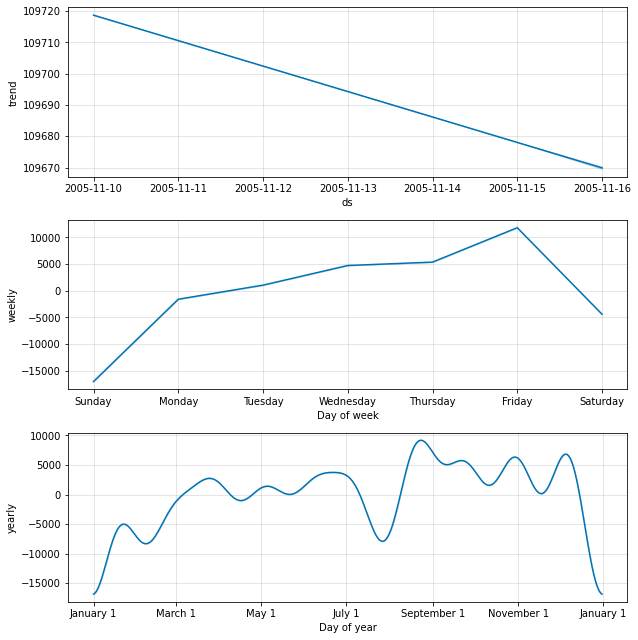

In [25]:
fig2 = model.plot_components(predictions)

# LSTM

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [30]:
data.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [32]:
tunnel = pd.read_csv('/content/drive/MyDrive/tunnel.csv', parse_dates=["Day"])


In [34]:
tunnel = tunnel.set_index("Day").to_period()
df_for_training = tunnel[['NumVehicles']].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(tunnel)
df_for_training_scaled = scaler.transform(tunnel)

In [36]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_past = 14  # Number of past days we want to use to predict the future.
n_future=7
#Reformat input data into a shape: (n_samples x timesteps x n_features)

for i in range(n_past, len(df_for_training_scaled) - n_future+1):
    trainX.append(df_for_training_scaled[i - n_past:i])
    trainY.append(df_for_training_scaled[i:i + n_future])
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (727, 14, 1).
trainY shape == (727, 7, 1).


In [37]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 7)                 231       
                                                                 
Total params: 87,399
Trainable params: 87,399
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
42/42 [==============================] - 5s 33ms/step - loss: 0.9464 - val_loss: 0.8751
Epoch 2/50
42/42 [==============================] - 1s 22ms/step - loss: 0.8658 - val_loss: 0.7858
Epoch 3/50
42/42 [==============================] - 1s 22ms/step - loss: 0.8245 - val_loss: 0.7600
Epoch 4/50
42/42 [==============================] - 1s 22ms/step - loss: 0.8109 - val_loss: 0.8209
Epoch 5/50
42/42 [==============================] - 1s 23ms/step - loss: 0.8027 - val_loss: 0.6923
Epoch 6/50
42/42 [==============================] - 1s 22ms/step - loss: 0.7597 - val_loss: 0.6108
Epoch 7/50
42/42 [==============================] - 1s 22ms/step - loss: 0.6937 - val_loss: 0.5362
Epoch 8/50
42/42 [==============================] - 1s 23ms/step - loss: 0.6342 - val_loss: 0.4614
Epoch 9/50
42/42 [==============================] - 1s 24ms/step - loss: 0.6268 - val_loss: 0.4391
Epoch 10/50
42/42 [==============================] - 1s 23ms/step - loss: 0.5899 - val_loss: 0.4023
Epoch 11/

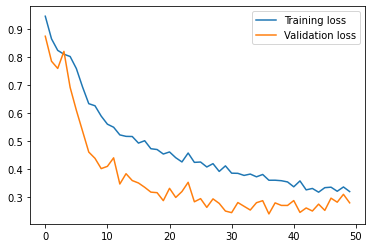

In [38]:
history = model.fit(trainX[:-n_future,:], trainY[:-n_future,:], epochs=50, batch_size=14, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [39]:
#predict_period_dates = pd.date_range(list(train_dates)[0], periods=len(train_dates))
train_dates = tunnel.index.to_timestamp()
prediction = model.predict(trainX)
y_pred_future = scaler.inverse_transform(prediction)[-1]

error = mean_squared_error(test,y_pred_future)
rmse = mean_squared_error(test, y_pred_future)**0.5
print('Test MSE: %.3f' % rmse)

23/23 [==============================] - 1s 17ms/step
Test MSE: 2345.925


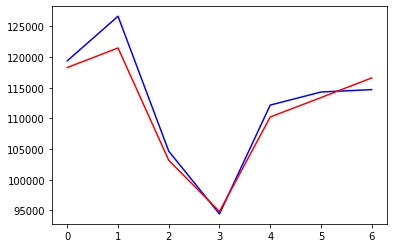

In [40]:
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(y_pred_future, color='red', label='pred')
pyplot.show()